In [4]:
#explore data
#Import Libraries

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree   
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [5]:
#Reading File
data_frame = pd.read_csv(r'titanic.csv')

#Display data
data_frame.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:

#Data Length
data_frame.shape

(891, 12)

In [7]:
#Data description
data_frame.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
data_frame['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [9]:
#Display first 10 lines
data_frame.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [10]:
#Display last 10 lines
data_frame.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


In [11]:
#Columns info
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [12]:
#Describe Age column
data_frame['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [13]:
#Describe Output (Target) Column
data_frame['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [15]:
#data cleanning
#Counting missing values
data_frame.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [16]:

#Drop two rows containing NaN in 'Embarked' Column
data_frame.dropna(axis=0, subset=['Embarked'], inplace=True)

In [17]:
#Counting missing values
data_frame.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [18]:
#Drop 'Cabin' Column
data_frame.drop('Cabin', axis=1, inplace=True)

In [19]:

#Counting missing values
data_frame.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [20]:

#Replacing NaN in 'Age' with mean
data_frame['Age'].fillna(data_frame['Age'].mean(), inplace=True)

In [21]:
data_frame['Age'].describe()

count    889.000000
mean      29.642093
std       12.968346
min        0.420000
25%       22.000000
50%       29.642093
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [22]:
#Verification step
data_frame.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

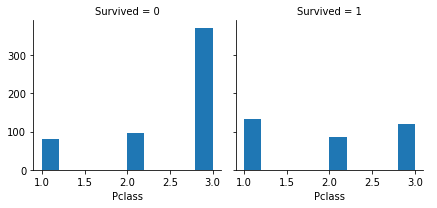

In [23]:
#Visualization part
#Variable Distribution
#Between Survived and Pclass
#Correlation between Survived and Pclass 

grid = sns.FacetGrid(data_frame, col='Survived')
grid.map(plt.hist, 'Pclass')
grid.add_legend()

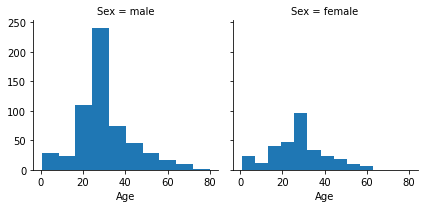

In [24]:
#Correlation between Sex and Age 


grid = sns.FacetGrid(data_frame, col='Sex')
grid.map(plt.hist,'Age')

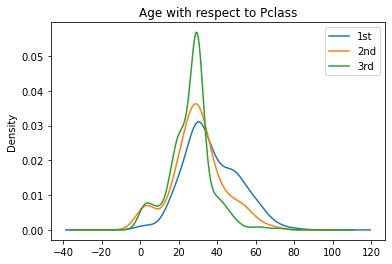

In [25]:
for x in [1,2,3]:    ## for 3 classes
    data_frame.Age[data_frame.Pclass == x].plot(kind="kde")
plt.title("Age with respect to Pclass")
plt.legend(("1st","2nd","3rd"))

<AxesSubplot:title={'center':'Histogram of different Ages'}, xlabel='Age', ylabel='Frequency'>

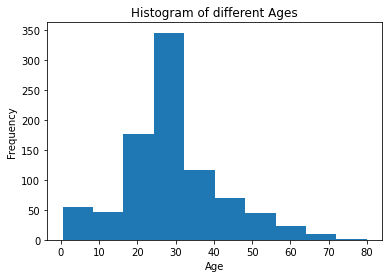

In [26]:
#'Age' Distribution with Histogram

plt.title('Histogram of different Ages')
plt.xlabel('Age')
data_frame['Age'].plot.hist()

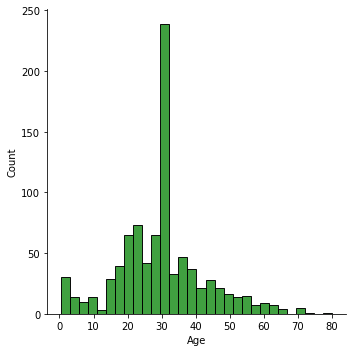

In [27]:
#'Age' Distribution with Histogram seaborn

sns.displot(data_frame['Age'], kind='hist', color='green')

<AxesSubplot:title={'center':'Histogram of different Pclass'}, xlabel='Pclass', ylabel='Frequency'>

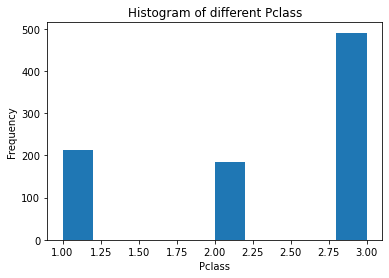

In [28]:

#'Pclass' Distribution with Histogram

plt.title('Histogram of different Pclass')
plt.xlabel('Pclass')
data_frame['Pclass'].plot.hist()

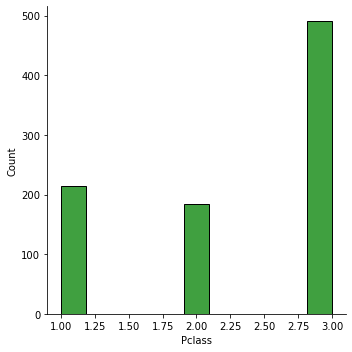

In [29]:
#'Pclass' Distribution with Histogram seaborn

sns.displot(data_frame['Pclass'],  kind='hist', color='green')

<AxesSubplot:title={'center':'Barplot'}, xlabel='Survived', ylabel='Survived Value Count'>

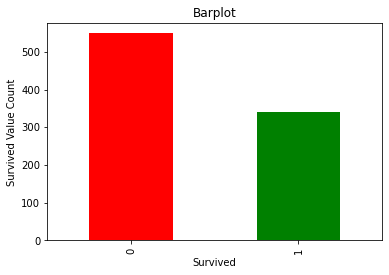

In [30]:
#Barplot 'Survived' Column

plt.xlabel('Survived')
plt.ylabel('Survived Value Count')
plt.title('Barplot')

counts = data_frame['Survived'].value_counts()
counts.plot.bar(color=['red','green'])

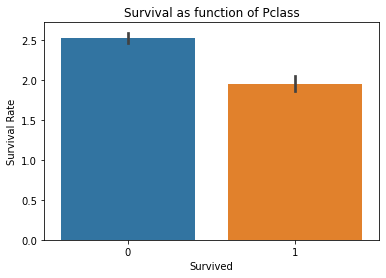

In [31]:
sns.barplot(x='Survived', y='Pclass', data=data_frame)
plt.ylabel("Survival Rate")
plt.title("Survival as function of Pclass")
plt.show()

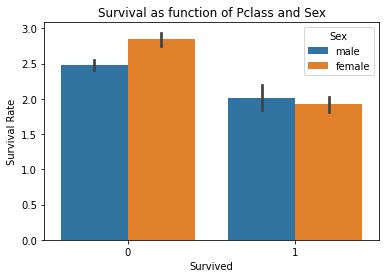

In [34]:
sns.barplot(x='Survived', y='Pclass', hue='Sex', data= data_frame)
plt.ylabel("Survival Rate")
plt.title("Survival as function of Pclass and Sex")
plt.show()

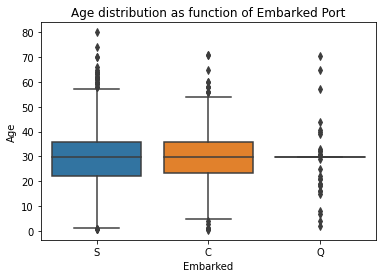

In [35]:
sns.boxplot(x='Embarked', y='Age', data=data_frame)
plt.title("Age distribution as function of Embarked Port")
plt.show()

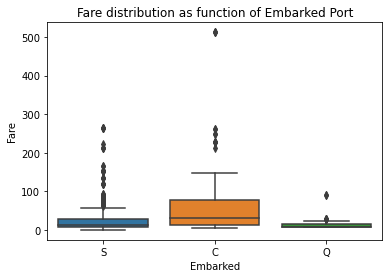

In [36]:
sns.boxplot(x='Embarked', y='Fare', data=data_frame)
plt.title("Fare distribution as function of Embarked Port")
plt.show()

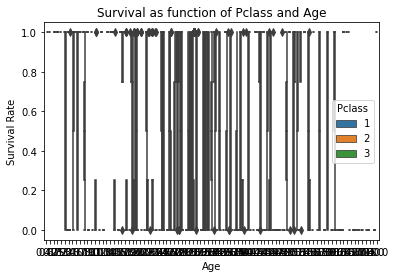

In [38]:
sns.boxplot(x='Age', y='Survived', hue='Pclass', data=data_frame)
plt.ylabel("Survival Rate")
plt.title("Survival as function of Pclass and Age")
plt.show()

In [39]:
#Variable Correlation
#LabelEncoder
#Replacing Survived with 0 and 1

encoder = LabelEncoder()
data_frame['Survived'] = encoder.fit_transform(data_frame['Survived'])
data_frame['Survived'].value_counts()

0    549
1    340
Name: Survived, dtype: int64

In [40]:
def plot_correlation_map( df ):

    corr = df.corr()
    s , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    s = sns.heatmap(corr,cmap = cmap,square=True, cbar_kws={ 'shrink' : .9 }, ax=ax, annot = True, annot_kws = 
                    { 'fontsize' : 12 } )

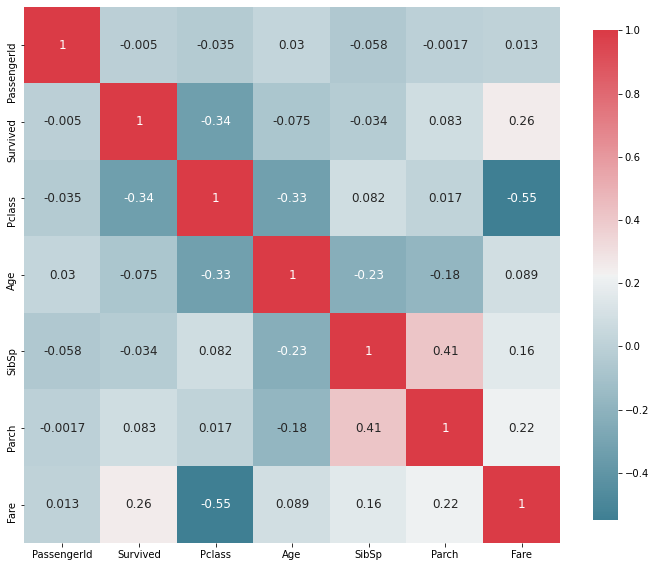

In [41]:

plot_correlation_map(data_frame)

In [42]:
#GroupBy Function groupBy Pclass
data_frame[["Pclass", "Survived"]].groupby(["Pclass"], as_index=True).mean()

,Survived
Pclass,
1,0.626168
2,0.472826
3,0.242363


In [43]:
data_frame[["Sex", "Survived"]].groupby(["Sex"], as_index=True).mean()

,Survived
Sex,
female,0.740385
male,0.188908


In [44]:
#Add 'Title' Column

data_frame['Title'] = data_frame.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())
data_frame['Title'].head()

0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
Name: Title, dtype: object

In [45]:
#Counts Value 'Title'
data_frame['Title'].value_counts()

Mr              517
Miss            181
Mrs             124
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
Sir               1
Ms                1
Capt              1
Don               1
Lady              1
Jonkheer          1
Mme               1
the Countess      1
Name: Title, dtype: int64

In [46]:
#Drop 'Name' Column

data_frame.drop('Name', axis = 1, inplace = True)
data_frame.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,S,Mr
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C,Mrs
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,4,1,1,female,35.0,1,0,113803,53.1000,S,Mrs
4,5,0,3,male,35.0,0,0,373450,8.0500,S,Mr


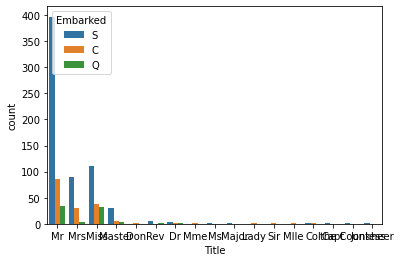

In [47]:
#Title with Embarked

sns.countplot(x="Title", hue="Embarked", data = data_frame)
plt.show()

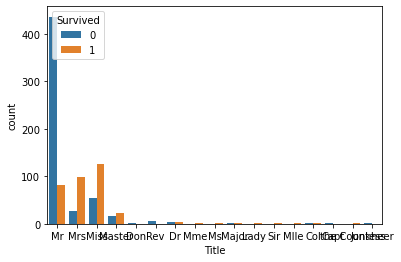

In [48]:
#Title with Survived

sns.countplot(x="Title", hue="Survived", data = data_frame)
plt.show()

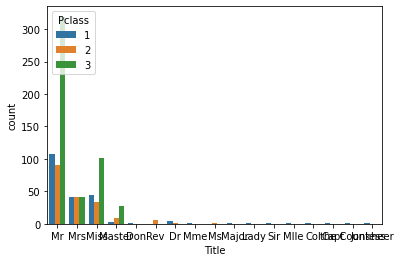

In [49]:
#Title with Pclass

sns.countplot(x="Title",  hue="Pclass", data = data_frame)
plt.show()

In [50]:
data_frame['Title'].value_counts()

Mr              517
Miss            181
Mrs             124
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
Sir               1
Ms                1
Capt              1
Don               1
Lady              1
Jonkheer          1
Mme               1
the Countess      1
Name: Title, dtype: int64

In [51]:
#Create new Dictionary

Title_Dictionary =  {
    
                    "Capt":"Officer",
                    "Col":"Officer",
                    "Major":"Officer",
                    "Dr":"Officer",
                    "Rev":"Officer",
                    "Jonkheer":"Royalty",
                    "Don":"Royalty",
                    "Sir":"Royalty",
                    "Lady":"Royalty",
                    "the Countess":"Royalty",
                    "Mme":"Miss",
                    "Mlle":"Miss",
                    "Miss":"Miss",
                    "Ms":"Mrs",
                    "Mr":"Mrs",
                    "Mrs":"Mrs",
                    "Master":"Master"
    
                    }
data_frame['Title'] = data_frame['Title'].map(Title_Dictionary)

In [52]:
data_frame['Title'].value_counts()

Mrs        642
Miss       184
Master      40
Officer     18
Royalty      5
Name: Title, dtype: int64

In [53]:
data_frame['Title'].head()

0     Mrs
1     Mrs
2    Miss
3     Mrs
4     Mrs
Name: Title, dtype: object

In [54]:
pd.crosstab([data_frame["Title"], data_frame["Survived"]], data_frame["Pclass"], margins = True).style.background_gradient(cmap = "summer_r")

In [55]:
pd.crosstab([data_frame["Title"], data_frame["Survived"]], data_frame["SibSp"], margins = True).style.background_gradient(cmap = "summer_r")

In [56]:
pd.crosstab([data_frame["Title"], data_frame["Survived"]], data_frame["Parch"], margins = True).style.background_gradient(cmap = "summer_r")

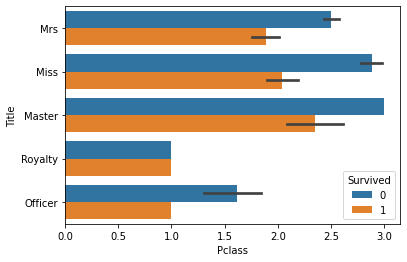

In [57]:
sns.barplot(x = "Pclass", y = "Title", hue = "Survived", data = data_frame)
plt.show()

In [58]:
#Create New Feature 'FamilySize'

data_frame["FamilySize"] = data_frame["SibSp"] + data_frame["Parch"] + 1
data_frame.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,FamilySize
0,1,0,3,male,22.000000,1,0,A/5 21171,7.2500,S,Mrs,2
1,2,1,1,female,38.000000,1,0,PC 17599,71.2833,C,Mrs,2
2,3,1,3,female,26.000000,0,0,STON/O2. 3101282,7.9250,S,Miss,1
3,4,1,1,female,35.000000,1,0,113803,53.1000,S,Mrs,2
4,5,0,3,male,35.000000,0,0,373450,8.0500,S,Mrs,1
5,6,0,3,male,29.642093,0,0,330877,8.4583,Q,Mrs,1
6,7,0,1,male,54.000000,0,0,17463,51.8625,S,Mrs,1
7,8,0,3,male,2.000000,3,1,349909,21.0750,S,Master,5
8,9,1,3,female,27.000000,0,2,347742,11.1333,S,Mrs,3
9,10,1,2,female,14.000000,1,0,237736,30.0708,C,Mrs,2


In [59]:
#Correlation Groupby Titile 

data_frame[["Title", "Fare"]].groupby(["Title"], as_index=True).mean()

,Fare
Title,
Master,34.703125
Miss,43.909332
Mrs,28.366983
Officer,35.786344
Royalty,42.150000


In [60]:
#Data_Transformation
data_frame.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,FamilySize
0,1,0,3,male,22.000000,1,0,A/5 21171,7.2500,S,Mrs,2
1,2,1,1,female,38.000000,1,0,PC 17599,71.2833,C,Mrs,2
2,3,1,3,female,26.000000,0,0,STON/O2. 3101282,7.9250,S,Miss,1
3,4,1,1,female,35.000000,1,0,113803,53.1000,S,Mrs,2
4,5,0,3,male,35.000000,0,0,373450,8.0500,S,Mrs,1
5,6,0,3,male,29.642093,0,0,330877,8.4583,Q,Mrs,1
6,7,0,1,male,54.000000,0,0,17463,51.8625,S,Mrs,1
7,8,0,3,male,2.000000,3,1,349909,21.0750,S,Master,5
8,9,1,3,female,27.000000,0,2,347742,11.1333,S,Mrs,3
9,10,1,2,female,14.000000,1,0,237736,30.0708,C,Mrs,2


In [61]:
#Drop 'PassengerId' column
data_frame.drop('PassengerId', axis=1, inplace=True)

In [63]:
data_frame.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,FamilySize
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S,Mrs,2
1,1,1,female,38.0,1,0,PC 17599,71.2833,C,Mrs,2
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss,1
3,1,1,female,35.0,1,0,113803,53.1000,S,Mrs,2
4,0,3,male,35.0,0,0,373450,8.0500,S,Mrs,1


In [64]:
#Normalize 'Embarked' Column

embarked_code = pd.get_dummies(data_frame['Embarked'])
data_frame = data_frame.drop('Embarked' , axis = 1)
data_frame = data_frame.join(embarked_code)
data_frame.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Title,FamilySize,C,Q,S
0,0,3,male,22.0,1,0,A/5 21171,7.2500,Mrs,2,0,0,1
1,1,1,female,38.0,1,0,PC 17599,71.2833,Mrs,2,1,0,0
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,Miss,1,0,0,1
3,1,1,female,35.0,1,0,113803,53.1000,Mrs,2,0,0,1
4,0,3,male,35.0,0,0,373450,8.0500,Mrs,1,0,0,1


In [65]:
#Normalize 'Sex' Column

embarked_code = pd.get_dummies(data_frame['Sex'])
data_frame = data_frame.drop('Sex' , axis = 1)
data_frame = data_frame.join(embarked_code)
data_frame.head()

,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Title,FamilySize,C,Q,S,female,male
0,0,3,22.0,1,0,A/5 21171,7.2500,Mrs,2,0,0,1,0,1
1,1,1,38.0,1,0,PC 17599,71.2833,Mrs,2,1,0,0,1,0
2,1,3,26.0,0,0,STON/O2. 3101282,7.9250,Miss,1,0,0,1,1,0
3,1,1,35.0,1,0,113803,53.1000,Mrs,2,0,0,1,1,0
4,0,3,35.0,0,0,373450,8.0500,Mrs,1,0,0,1,0,1


In [66]:

#Drop 'Ticket' Column

data_frame.drop('Ticket', axis=1, inplace=True)
data_frame.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Title,FamilySize,C,Q,S,female,male
0,0,3,22.0,1,0,7.2500,Mrs,2,0,0,1,0,1
1,1,1,38.0,1,0,71.2833,Mrs,2,1,0,0,1,0
2,1,3,26.0,0,0,7.9250,Miss,1,0,0,1,1,0
3,1,1,35.0,1,0,53.1000,Mrs,2,0,0,1,1,0
4,0,3,35.0,0,0,8.0500,Mrs,1,0,0,1,0,1


In [67]:
#Standardize 'Age' Column with MinMaxScaler

scaler = preprocessing.MinMaxScaler()
scaler.fit(data_frame[['Age']])
data_frame["Age2"] = scaler.fit_transform(data_frame[['Age']])
data_frame.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Title,FamilySize,C,Q,S,female,male,Age2
0,0,3,22.0,1,0,7.2500,Mrs,2,0,0,1,0,1,0.271174
1,1,1,38.0,1,0,71.2833,Mrs,2,1,0,0,1,0,0.472229
2,1,3,26.0,0,0,7.9250,Miss,1,0,0,1,1,0,0.321438
3,1,1,35.0,1,0,53.1000,Mrs,2,0,0,1,1,0,0.434531
4,0,3,35.0,0,0,8.0500,Mrs,1,0,0,1,0,1,0.434531


In [68]:
data_frame.drop('Age' , axis = 1 , inplace = True)
data_frame.rename(columns={'Age2': 'Age'} , inplace=True)
data_frame.head()

,Survived,Pclass,SibSp,Parch,Fare,Title,FamilySize,C,Q,S,female,male,Age
0,0,3,1,0,7.2500,Mrs,2,0,0,1,0,1,0.271174
1,1,1,1,0,71.2833,Mrs,2,1,0,0,1,0,0.472229
2,1,3,0,0,7.9250,Miss,1,0,0,1,1,0,0.321438
3,1,1,1,0,53.1000,Mrs,2,0,0,1,1,0,0.434531
4,0,3,0,0,8.0500,Mrs,1,0,0,1,0,1,0.434531


In [69]:
data_frame['Title'].value_counts()

Mrs        642
Miss       184
Master      40
Officer     18
Royalty      5
Name: Title, dtype: int64

In [70]:
#Feature Transformation

data_frame["Title"].replace(["Mrs", "Miss", "Master", "Officer", "Royalty"], [0, 1, 2, 3, 4], inplace = True)

In [71]:
data_frame.head()

,Survived,Pclass,SibSp,Parch,Fare,Title,FamilySize,C,Q,S,female,male,Age
0,0,3,1,0,7.2500,0,2,0,0,1,0,1,0.271174
1,1,1,1,0,71.2833,0,2,1,0,0,1,0,0.472229
2,1,3,0,0,7.9250,1,1,0,0,1,1,0,0.321438
3,1,1,1,0,53.1000,0,2,0,0,1,1,0,0.434531
4,0,3,0,0,8.0500,0,1,0,0,1,0,1,0.434531


In [72]:
#Supervised Machine Learning
#Decision Tree
#Splitting dataset into a training set and a testing set
#features extraction

x = data_frame.drop('Survived' , axis=1)
y = data_frame['Survived']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=1)

In [73]:
#Feature Scalling
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.fit_transform(x_test)

In [74]:
#Build Model
treeClass = tree.DecisionTreeClassifier(max_depth = 7)  
treeClass.fit(x_train, y_train)   #fitting our model
pred=treeClass.predict(x_test)   # evaluating our modelc
print("Accuracy Score: {}".format(accuracy_score(y_test, pred)))

Accuracy Score: 0.8161434977578476


In [75]:
#Plot Model
import graphviz
from sklearn.tree import export_graphviz

dot_data = export_graphviz(treeClass, out_file=None) 
graph = graphviz.Source(dot_data)
graph.render("data_frame")
for i in range(len(x.columns)):
        print(i, x.columns[i])
        
    
graph

ModuleNotFoundError: No module named 'graphviz'

In [76]:
#decision tree
for i in range(1,11):
    treeClass = tree.DecisionTreeClassifier(criterion='entropy',max_depth = i, splitter='random')  
    treeClass.fit(x_train, y_train)   #fitting our model
    pred=treeClass.predict(x_test)   # evaluating our modelc
    print('Max_depth :', i, "--> Accuracy Score: {}".format(accuracy_score(y_test, pred)))

Max_depth : 1 --> Accuracy Score: 0.8340807174887892
Max_depth : 2 --> Accuracy Score: 0.8116591928251121
Max_depth : 3 --> Accuracy Score: 0.8116591928251121
Max_depth : 4 --> Accuracy Score: 0.8340807174887892
Max_depth : 5 --> Accuracy Score: 0.8475336322869955
Max_depth : 6 --> Accuracy Score: 0.7668161434977578
Max_depth : 7 --> Accuracy Score: 0.6412556053811659
Max_depth : 8 --> Accuracy Score: 0.8295964125560538
Max_depth : 9 --> Accuracy Score: 0.7982062780269058
Max_depth : 10 --> Accuracy Score: 0.8161434977578476


In [77]:
#Random Forest
#Build Model
clf=RandomForestClassifier(n_estimators=10)  #Creating a random forest with 100 decision trees
clf.fit(x_train, y_train)   #fitting our model
pred=clf.predict(x_test)   # evaluating our modelc
print("Accuracy Score: {}".format(accuracy_score(y_test, pred)))

Accuracy Score: 0.8295964125560538


In [78]:
#Random Forest Parameters
for i in range(10,101,10):
    clf=RandomForestClassifier(n_estimators=i)  #Creating a random forest with 100 decision trees
    clf.fit(x_train, y_train)   #fitting our model
    pred=clf.predict(x_test)   # evaluating our modelc
    print('N_Estimators :', i, "--> Accuracy Score: {}".format(accuracy_score(y_test, pred)))

N_Estimators : 10 --> Accuracy Score: 0.820627802690583
N_Estimators : 20 --> Accuracy Score: 0.8026905829596412
N_Estimators : 30 --> Accuracy Score: 0.820627802690583
N_Estimators : 40 --> Accuracy Score: 0.8161434977578476
N_Estimators : 50 --> Accuracy Score: 0.8340807174887892
N_Estimators : 60 --> Accuracy Score: 0.8161434977578476
N_Estimators : 70 --> Accuracy Score: 0.7982062780269058
N_Estimators : 80 --> Accuracy Score: 0.8116591928251121
N_Estimators : 90 --> Accuracy Score: 0.8116591928251121
N_Estimators : 100 --> Accuracy Score: 0.7982062780269058


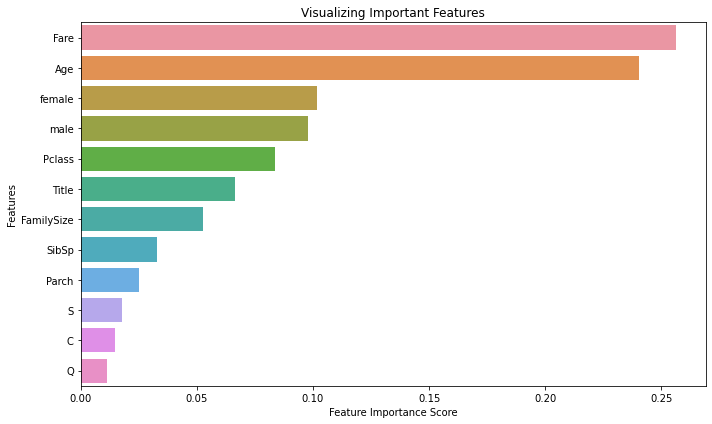

In [79]:
#important fetures
feature_imp = pd.Series(clf.feature_importances_, index=x.columns).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.tight_layout()

In [80]:
#Remove Less important features
#Drop Features
new_x = x.drop(['Q','S','C','Parch'], axis=1)
new_x.head()

,Pclass,SibSp,Fare,Title,FamilySize,female,male,Age
0,3,1,7.2500,0,2,0,1,0.271174
1,1,1,71.2833,0,2,1,0,0.472229
2,3,0,7.9250,1,1,1,0,0.321438
3,1,1,53.1000,0,2,1,0,0.434531
4,3,0,8.0500,0,1,0,1,0.434531


In [81]:
#Splitting Training / Testing
x_train,x_test,y_train,y_test=train_test_split(new_x,y,test_size=0.25,random_state=1)

In [82]:
#Build Model
clf=RandomForestClassifier(n_estimators=10)  #Creating a random forest with 100 decision trees
clf.fit(x_train, y_train)   #fitting our model
pred=clf.predict(x_test)   # evaluating our modelc
print("Accuracy Score: {}".format(accuracy_score(y_test, pred)))

Accuracy Score: 0.820627802690583


In [83]:
for i in range(10,101,10):
    clf=RandomForestClassifier(n_estimators=i)  #Creating a random forest with 100 decision trees
    clf.fit(x_train, y_train)   #fitting our model
    pred=clf.predict(x_test)   # evaluating our modelc
    print('N_Estimators :', i, "--> Accuracy Score: {}".format(accuracy_score(y_test, pred)))

N_Estimators : 10 --> Accuracy Score: 0.8340807174887892
N_Estimators : 20 --> Accuracy Score: 0.8430493273542601
N_Estimators : 30 --> Accuracy Score: 0.8385650224215246
N_Estimators : 40 --> Accuracy Score: 0.8565022421524664
N_Estimators : 50 --> Accuracy Score: 0.8430493273542601
N_Estimators : 60 --> Accuracy Score: 0.8385650224215246
N_Estimators : 70 --> Accuracy Score: 0.8295964125560538
N_Estimators : 80 --> Accuracy Score: 0.8430493273542601
N_Estimators : 90 --> Accuracy Score: 0.8295964125560538
N_Estimators : 100 --> Accuracy Score: 0.8295964125560538
